# Harris Corner Detector

2021021699 Yuwon Lee<br>
2021021581 Jinha Lim<br>
2021021580 Shinhye Lee

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import numpy as np

In [33]:
def gaussian2d(x,y,sigma):
    x2 = x**2
    y2 = y**2
    sigma2 = sigma**2
    return (1/(2*np.pi*sigma2))*np.exp(-1*((x2+y2)/(2*sigma2)))

In [38]:
def get_gaussian_kernel(size, sigma=1.0):
    if size % 2 == 0:
        size += 1
    aran = np.arange(-1 * (size // 2), size // 2 + 1)
    XX, YY = np.meshgrid(aran, aran)
    kernel = gaussian2d(XX, YY, sigma)
    kernel = kernel/np.sum(kernel) # normalization
    return kernel

In [45]:
def filter(weights,roi):
    weights = weights.astype('float')
    roi = roi.astype('float')
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)

    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            filtered[j,i]= np.sum(weights * roi[j-width:j+width+1, i-height:i+height+1])
    
    return filtered

In [49]:
def cornerDetec(img, winSize=7, type=0):
    h, w = img.shape[:2]
    filter_sobelx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])
    I_x=filter(filter_sobelx, img)

    filter_sobely = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    I_y=filter(filter_sobely, img)

    g_kernel = get_gaussian_kernel(winSize)

    H = np.zeros((h,w,2,2))
    H[:, :, 0, 0] = filter(g_kernel, np.square(I_x))
    H[:, :, 0, 1] = filter(g_kernel, I_x*I_y)
    H[:, :, 1, 0] = filter(g_kernel, I_x*I_y)
    H[:, :, 1, 1] = filter(g_kernel, np.square(I_y))

    corner_strength = np.zeros((h,w))

    if type == 0:
        k = 0.04
        for idx_h in range(h):
            for idx_w in range(w):
                ev = np.linalg.eigvals(H[idx_h, idx_w, :, :])
                corner_strength[idx_h][idx_w] = ev[0] * ev[1] - (k * ((ev[0] + ev[1])**2))
    elif type == 1:
        k = 0.04
        for idx_h in range(h):
            for idx_w in range(w):
                det = np.linalg.det(H[idx_h, idx_w, :, :])
                tr = np.trace(H[idx_h, idx_w, :, :])
                corner_strength[idx_h][idx_w] = det - (k*(tr**2))
    
    else:
        raise ValueError("Need type: 0 or 1")


    return corner_strength

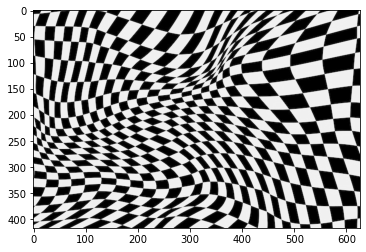

In [43]:
img = plt.imread('image1.png')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
img = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(img, cmap='gray')
plt.show()

In [50]:
corner = cornerDetec(img, 7, 0)
plt.imshow(corner, cmap='gray')
plt.show()